In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_tsne = pd.read_parquet('data/results/df_tsne.parquet')
df_tsne.head()

,PC1,PC2,Label
0,-18.322725,-16.672157,Syn
1,-54.868546,-18.410553,Syn
2,-45.054012,13.397923,Syn
3,-39.239132,-16.504389,Syn
4,-46.235340,1.965008,Syn


In [9]:
df_tsne_no_benign = pd.read_parquet('data/results/df_tsne_no_benign.parquet')
df_tsne_no_benign.head()

,PC1,PC2,Label
0,-4.541570,-11.997326,Syn
1,-49.244247,-6.464272,Syn
2,-13.750749,8.129172,Syn
3,-34.420837,-13.216851,Syn
4,-25.592207,4.358292,Syn


In [10]:
# import kmeans
from sklearn.cluster import KMeans

# create kmeans object
kmeans = KMeans(n_clusters=5, n_init=10, random_state=123)

# fit kmeans object to data
kmeans.fit(df_tsne[['PC1', 'PC2']])

# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)

[[  2.6416109  -5.096029 ]
 [ 47.48092    -1.1373363]
 [ -3.725234   45.56413  ]
 [ -1.9132318 -55.201504 ]
 [-44.79997    -5.739169 ]]


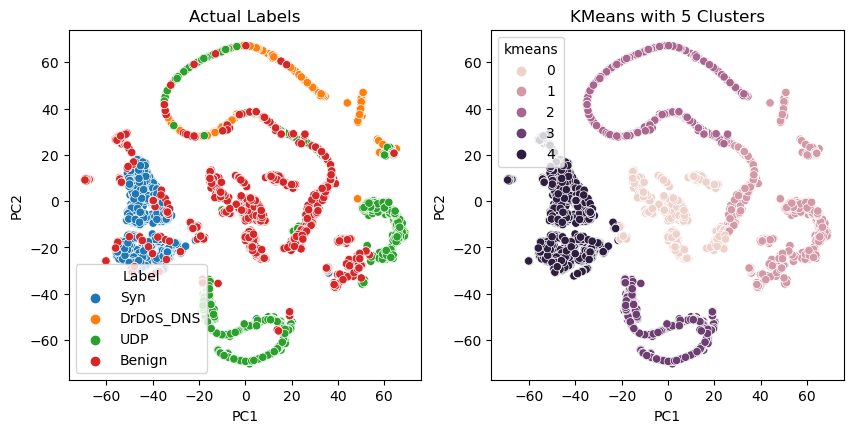

In [11]:
# plot the data and the clusters learned
df_tsne['kmeans'] = kmeans.labels_
fig = plt.figure(figsize=(10, 10))
plt.subplot(221)
sns.scatterplot(x='PC1', y='PC2', hue='Label', data=df_tsne)
plt.title('Actual Labels')
plt.subplot(222)
sns.scatterplot(x='PC1', y='PC2', hue='kmeans', data=df_tsne)
plt.title('KMeans with 5 Clusters')
plt.show()

We can see that k-means is not able to separate the data into the correct clusters. This is because the shape of the k-means' clusters is always spherical, and it looks for clusters of equal variance, which in this case, is not the case.

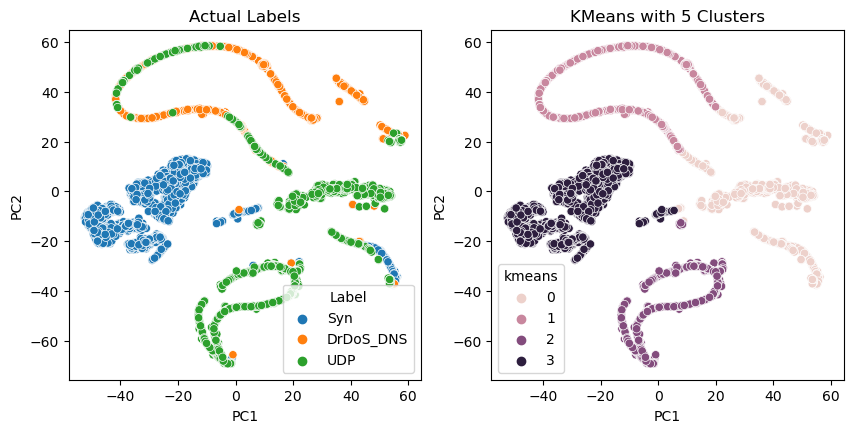

In [12]:
# k-means on data without benign
# create kmeans object
kmeans = KMeans(n_clusters=4, n_init=10, random_state=123)

# fit kmeans object to data
kmeans.fit(df_tsne_no_benign[['PC1', 'PC2']])
df_tsne_no_benign['kmeans'] = kmeans.labels_

# plot the data and the clusters learned
fig = plt.figure(figsize=(10, 10))
plt.subplot(221)
sns.scatterplot(x='PC1', y='PC2', hue='Label', data=df_tsne_no_benign)
plt.title('Actual Labels')
plt.subplot(222)
sns.scatterplot(x='PC1', y='PC2', hue='kmeans', data=df_tsne_no_benign)
plt.title('KMeans with 5 Clusters')
plt.show()

We can see that on the datas without the benign is easier for a clustering with k-means. However the circular shape of the clusters is not the best for the data. We can see that the clusters are not well separated except for the Syn Label.